#  Propagation d'opinion chez les moutons

## Partie A

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps

In [25]:
def propagation (k, N):
    if k==0:
        return 0
    if k==N:
        return N
    aleatoire = npr.randint (0, N)
    if aleatoire < k:
        return k+1
    else:
        return k-1

In [26]:
def trajectoireAleatoire (m, N, T):
    trajectoire = [m]
    for i in range(T):
        m = propagation(m, N)
        trajectoire.append(m)
    return trajectoire

In [27]:
def afficheTrajectoire(initialisation, N, T):
    X = np.arange(T+1)
    plt.figure(figsize=(20,14))
    plt.title(f"Simulation de trajectoires avec N={N} et T={T}", fontsize=15)
    for m in initialisation:
        plt.plot(X, trajectoireAleatoire(m, N, T), label="Trajectoire pour m = " + str(m))
        plt.legend(loc='best')
    plt.show()

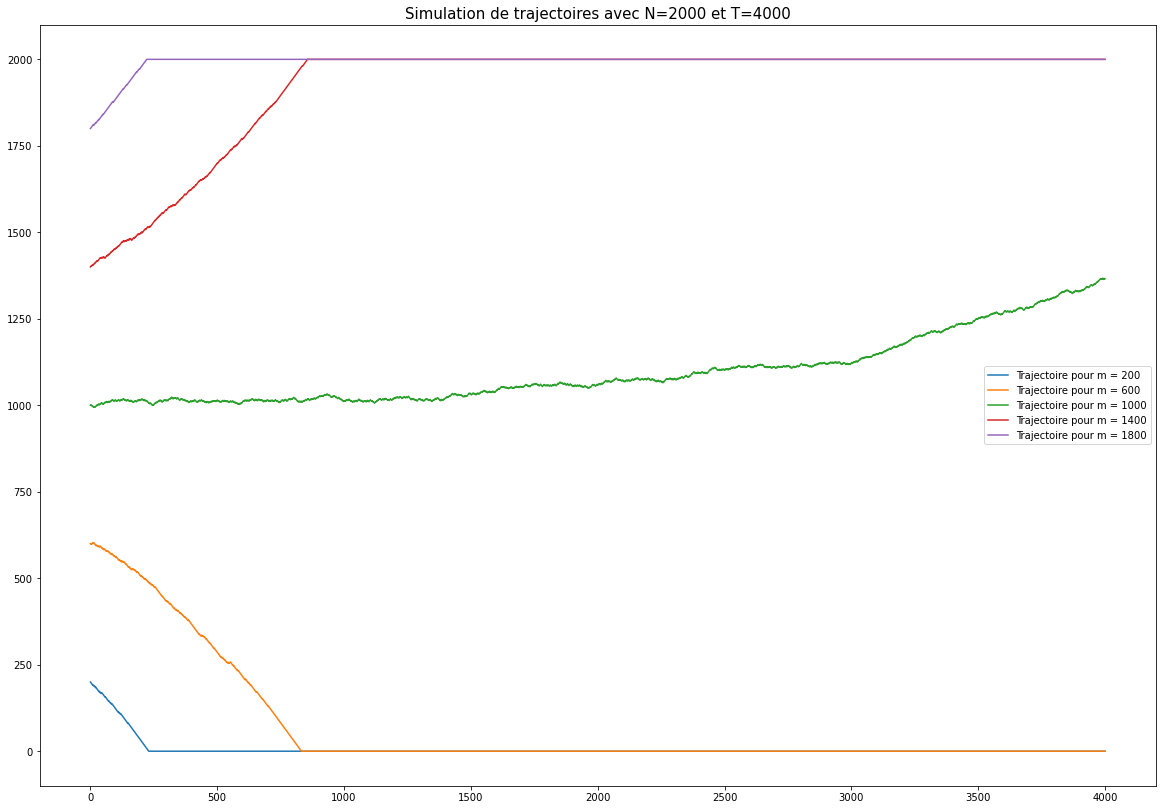

In [28]:
N = 2000
T = 4000
initialisation = [200, 600, 1000, 1400, 1800]
afficheTrajectoire(initialisation, N, T)

Pour que M(t) soit égal à k, il y a deux possibilités (sachant qu'on a ici exclu les problèmes de bornes):
- Soit $M(t-1)=k-1$ et un mouton pro-Mac a bêlé (avec la probabilité $\frac{k-1}{N}$).
- Soit $M(t-1)=k+1$ et un mouton pro-Windows a bêlé (avec la probabilité $\frac{N - (k + 1)}{N}$).  
La formule des probabilités totales donne donc:
$$
p(t,k) = \frac{k - 1}{N}p(t - 1,k - 1) + \frac{N - (k + 1)}{N}p(t - 1,k + 1).
$$

- Pour $k=0$ :
    - Soit $M(t-1)=0$.
    - Soit $M(t-1)=1$ et un mouton pro-Windows a bêlé (avec la probabilité $\frac{N-1)}{N}$).  
Donc:
$$
p(t,0) = p(t-1,0) + \frac{N - 1}{N}p(t - 1,1).
$$
- Pour $k=1$ :
    - $M(t-1)=2$ et un mouton pro-Windows a bêlé (avec la probabilité $\frac{N-2)}{N}$).  
Donc:
$$
p(t,1) = \frac{N - 2}{N}p(t - 1,2).
$$
- Pour $k=N-1$ :
    - $M(t-1)=N-2$ et un mouton pro-Mac a bêlé (avec la probabilité $\frac{N-2)}{N}$).  
Donc
$$
p(t,N-1) = \frac{N - 2}{N}p(t - 1,N-2).
$$
- Pour $k=N$ :
    - Soit $M(t-1)=N$.
    - Soit $M(t-1)=N-1$ et un mouton pro-Mac a bêlé (avec la probabilité $\frac{N-1)}{N}$).   
Donc:
$$
p(t,N) = p(t-1,N) + \frac{N - 1}{N}p(t - 1,N-1).
$$